# Chicago Crime Data

## Libraries

In [1]:
pip install holidays

Note: you may need to restart the kernel to use updated packages.


In [2]:
import holidays
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import ticker
import matplotlib.ticker as mticks
import matplotlib.pyplot as plt
import seaborn as sns
import os


from holidays import country_holidays

SEED = 321
np.random.seed(SEED)

## Pulling The Data and Creating the Dataframe

In [3]:
## Run the cell below to attempt to programmatically find your crime file
import os,glob

## Getting the home folder from environment variables
home_folder = os.environ['HOME']
# print("- Your Home Folder is: " + home_folder)

## Check for downloads folder
if 'Downloads' in os.listdir(home_folder):
    
    
    # Print the Downloads folder path
    dl_folder = os.path.abspath(os.path.join(home_folder,'Downloads'))
    print(f"- Your Downloads folder is '{dl_folder}/'\n")
    
    ## checking for crime files using glob
    crime_files = sorted(glob.glob(dl_folder+'/**/Crimes_-_2001_to_Present*',recursive=True))
    
    # If more than 
    if len(crime_files)==1:
        RAW_FILE = crime_files[0]
        
    elif len(crime_files)>1:
        print('[i] The following files were found:')
        
        for i, fname in enumerate(crime_files):
            print(f"\tcrime_files[{i}] = '{fname}'")
        print(f'\n- Please fill in the RAW_FILE variable in the code cell below with the correct filepath.')

else:
    print(f'[!] Could not programmatically find your downloads folder.')
    print('- Try using Finder (on Mac) or File Explorer (Windows) to navigate to your Downloads folder.')


- Your Downloads folder is 'C:\Users\aliss\Downloads/'



In [4]:
## (Required) MAKE SURE TO CHANGE THIS VARIABLE TO MATCH YOUR LOCAL FILE NAME
RAW_FILE = r"C:/Users/aliss/Downloads/Crimes_-_2001_to_Present.csv"
	
RAW_FILE

'C:/Users/aliss/Downloads/Crimes_-_2001_to_Present.csv'

In [5]:
OUTPUT_FOLDER = 'Data/Chicago/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

In [6]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format',lambda x: f"{x:,.2f}")

In [7]:
chicago_full = pd.read_csv(RAW_FILE)
chicago_full

ID Case Number                    Date                  Block  \
0        10224738    HY411648  09/05/2015 01:30:00 PM        043XX S WOOD ST   
1        10224739    HY411615  09/04/2015 11:30:00 AM    008XX N CENTRAL AVE   
2        11646166    JC213529  09/01/2018 12:01:00 AM  082XX S INGLESIDE AVE   
3        10224740    HY411595  09/05/2015 12:45:00 PM      035XX W BARRY AVE   
4        10224741    HY411610  09/05/2015 01:00:00 PM    0000X N LARAMIE AVE   
...           ...         ...                     ...                    ...   
7813916  12847575    JF420478  09/01/2022 05:00:00 AM        005XX W SURF ST   
7813917  12847801    JF420319  07/08/2022 12:00:00 AM    114XX S PRAIRIE AVE   
7813918  12847324    JF420102  09/27/2022 11:00:00 AM        023XX E 70TH ST   
7813919  12847570    JF420427  09/03/2022 10:25:00 AM     052XX W CARMEN AVE   
7813920  12840464    JF411839  09/26/2022 07:20:00 PM      0000X N MASON AVE   

         IUCR        Primary Type                    Description  \
0        0486             BATTERY        DOMESTIC BATTERY SIMPLE   
1        0870               THEFT                 POCKET-PICKING   
2        0810               THEFT                      OVER $500   
3        2023           NARCOTICS          POSS: HEROIN(BRN/TAN)   
4        0560             ASSAULT                         SIMPLE   
...       ...                 ...                            ...   
7813916  2825       OTHER OFFENSE        HARASSMENT BY TELEPHONE   
7813917  1130  DECEPTIVE PRACTICE       FRAUD OR CONFIDENCE GAME   
7813918  0810               THEFT                      OVER $500   
7813919  2021           NARCOTICS         POSSESS - BARBITURATES   
7813920  143A   WEAPONS VIOLATION  UNLAWFUL POSSESSION - HANDGUN   

                    Location Description  Arrest  Domestic  Beat  District  \
0                              RESIDENCE   False      True   924      9.00   
1                                CTA BUS   False     False  1511     15.00   
2                              RESIDENCE   False      True   631      6.00   
3                               SIDEWALK    True     False  1412     14.00   
4                              APARTMENT   False      True  1522     15.00   
...                                  ...     ...       ...   ...       ...   
7813916                        RESIDENCE   False      True  1934     19.00   
7813917                           STREET   False     False   531      5.00   
7813918                        RESIDENCE   False     False   331      3.00   
7813919  RESIDENCE - YARD (FRONT / BACK)    True     False  1623     16.00   
7813920                         SIDEWALK    True     False  1513     15.00   

         Ward  Community Area FBI Code  X Coordinate  Y Coordinate  Year  \
0       12.00           61.00      08B  1,165,074.00  1,875,917.00  2015   
1       29.00           25.00       06  1,138,875.00  1,904,869.00  2015   
2        8.00           44.00       06           NaN           NaN  2018   
3       35.00           21.00       18  1,152,037.00  1,920,384.00  2015   
4       28.00           25.00      08A  1,141,706.00  1,900,086.00  2015   
...       ...             ...      ...           ...           ...   ...   
7813916 44.00            6.00       26  1,172,497.00  1,919,410.00  2022   
7813917  9.00           49.00       11  1,179,966.00  1,828,818.00  2022   
7813918  5.00           43.00       06  1,193,181.00  1,859,005.00  2022   
7813919 45.00           11.00       18  1,140,553.00  1,933,418.00  2022   
7813920 29.00           25.00       15  1,136,773.00  1,899,652.00  2022   

                     Updated On  Latitude  Longitude  \
0        02/10/2018 03:50:01 PM     41.82     -87.67   
1        02/10/2018 03:50:01 PM     41.90     -87.77   
2        04/06/2019 04:04:43 PM       NaN        NaN   
3        02/10/2018 03:50:01 PM     41.94     -87.72   
4        02/10/2018 03:50:01 PM     41.88     -87.76   
...                         ...       ...        ..

In [8]:
date_format = "%m/%d/%Y %H:%M:%S %p"

example = chicago_full.loc[0,'Date']
display(example)
pd.to_datetime(example,format=date_format)

'09/05/2015 01:30:00 PM'

Timestamp('2015-09-05 01:30:00')

In [9]:
chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full = chicago_full.set_index('Datetime')
chicago_full

ID Case Number                    Date  \
Datetime                                                            
2001-01-01 01:00:00   1311933     G002620  01/01/2001 01:00:00 AM   
2001-01-01 01:00:00   6154338    HP242745  01/01/2001 01:00:00 PM   
2001-01-01 01:00:00   3212105    HK228274  01/01/2001 01:00:00 AM   
2001-01-01 01:00:00   1315987     G001152  01/01/2001 01:00:00 AM   
2001-01-01 01:00:00   1422085     G143929  01/01/2001 01:00:00 AM   
...                       ...         ...                     ...   
2023-06-01 12:51:00  13093875    JG285565  06/01/2023 12:51:00 AM   
2023-06-01 12:52:00  13092604    JG283764  06/01/2023 12:52:00 PM   
2023-06-01 12:52:00  13092639    JG283685  06/01/2023 12:52:00 PM   
2023-06-01 12:53:00  13092053    JG283086  06/01/2023 12:53:00 AM   
2023-06-01 12:55:00  13092118    JG283174  06/01/2023 12:55:00 AM   

                                     Block  IUCR                Primary Type  \
Datetime                                                                       
2001-01-01 01:00:00     016XX N LEAVITT ST  1563                 SEX OFFENSE   
2001-01-01 01:00:00     065XX S KEDZIE AVE  0840                       THEFT   
2001-01-01 01:00:00        029XX W 38TH PL  1754  OFFENSE INVOLVING CHILDREN   
2001-01-01 01:00:00      009XX N HUDSON AV  1310             CRIMINAL DAMAGE   
2001-01-01 01:00:00  016XX S CALIFORNIA AV  2820               OTHER OFFENSE   
...                                    ...   ...                         ...   
2023-06-01 12:51:00  019XX W DIVERSEY PKWY  0820                       THEFT   
2023-06-01 12:52:00   002XX W JACKSON BLVD  2024                   NARCOTICS   
2023-06-01 12:52:00    070XX S MERRILL AVE  141A           WEAPONS VIOLATION   
2023-06-01 12:53:00   015XX W MARQUETTE RD  0486                     BATTERY   
2023-06-01 12:55:00  108XX S EGGLESTON AVE  0810                       THEFT   

                                        Description Location Description  \
Datetime                                                                   
2001-01-01 01:00:00           CRIMINAL SEXUAL ABUSE            RESIDENCE   
2001-01-01 01:00:00   FINANCIAL ID THEFT: OVER $300            RESIDENCE   
2001-01-01 01:00:00  AGG SEX ASSLT OF CHILD FAM MBR            RESIDENCE   
2001-01-01 01:00:00                     TO PROPERTY        CHA APARTMENT   
2001-01-01 01:00:00                TELEPHONE THREAT            RESIDENCE   
...                                             ...                  ...   
2023-06-01 12:51:00                  $500 AND UNDER               STREET   
2023-06-01 12:52:00        POSSESS - HEROIN (WHITE)                ALLEY   
2023-06-01 12:52:00          UNLAWFUL USE - HANDGUN                ALLEY   
2023-06-01 12:53:00         DOMESTIC BATTERY SIMPLE            APARTMENT   
2023-06-01 12:55:00                       OVER $500               STREET   

                     Arrest  Domestic  Beat  District  Ward  Community Area  \
Datetime                                                                      
2001-01-01 01:00:00    True     False  1434     14.00   NaN             NaN   
2001-01-01 01:00:00   False     False   831      8.00 15.00           66.00   
2001-01-01 01:00:00    True     False   913      9.00 14.00           58.00   
2001-01-01 01:00:00   False     False  1823     18.00   NaN             NaN   
2001-01-01 01:00:00   False      True  1023     10.00   NaN             NaN   
...                     ...       ...   ...       ...   ...             ...   
2023-06-01 12:51:00   False     False  1931     19.00 32.00            7.00   
2023-06-01 12:52:00    True     False   122      1.00 34.00           32.00   
2023-06-01 12:52:00    True     False   331      3.00  5.00           43.00   
2023-06-01 12:53:00   False      True   725      7.00 16.00           67.00   
2023-06-01 12:55:00   False     False  2233     22.00 21.00           49.00   

                    FBI Code  X Coordinate  Y Coordinate  Year  \
Datet

In [10]:
(chicago_full.isna().sum()/len(chicago_full)).round(2)

ID                     0.00
Case Number            0.00
Date                   0.00
Block                  0.00
IUCR                   0.00
Primary Type           0.00
Description            0.00
Location Description   0.00
Arrest                 0.00
Domestic               0.00
Beat                   0.00
District               0.00
Ward                   0.08
Community Area         0.08
FBI Code               0.00
X Coordinate           0.01
Y Coordinate           0.01
Year                   0.00
Updated On             0.00
Latitude               0.01
Longitude              0.01
Location               0.01
dtype: float64

In [11]:
chicago_full["Year"] = chicago_full.index.year
chicago_full["Year"] = chicago_full["Year"].astype(str)
chicago_full["Year"].value_counts()

2002    486804
2001    485882
2003    475981
2004    469421
2005    453771
2006    448175
2007    437084
2008    427167
2009    392823
2010    370499
2011    351968
2012    336268
2013    307471
2014    275737
2016    269800
2017    269081
2018    268793
2015    264765
2019    261270
2022    238540
2020    212134
2021    208643
2023    101844
Name: Year, dtype: int64

In [12]:
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']

In [13]:
chicago_final = chicago_full.drop(columns=drop_cols).sort_index()#.reset_index()
chicago_final

ID                    Date  \
Datetime                                                
2001-01-01 01:00:00   1311933  01/01/2001 01:00:00 AM   
2001-01-01 01:00:00   6154338  01/01/2001 01:00:00 PM   
2001-01-01 01:00:00   3212105  01/01/2001 01:00:00 AM   
2001-01-01 01:00:00   1315987  01/01/2001 01:00:00 AM   
2001-01-01 01:00:00   1422085  01/01/2001 01:00:00 AM   
...                       ...                     ...   
2023-06-01 12:51:00  13093875  06/01/2023 12:51:00 AM   
2023-06-01 12:52:00  13092604  06/01/2023 12:52:00 PM   
2023-06-01 12:52:00  13092639  06/01/2023 12:52:00 PM   
2023-06-01 12:53:00  13092053  06/01/2023 12:53:00 AM   
2023-06-01 12:55:00  13092118  06/01/2023 12:55:00 AM   

                                   Primary Type  \
Datetime                                          
2001-01-01 01:00:00                 SEX OFFENSE   
2001-01-01 01:00:00                       THEFT   
2001-01-01 01:00:00  OFFENSE INVOLVING CHILDREN   
2001-01-01 01:00:00             CRIMINAL DAMAGE   
2001-01-01 01:00:00               OTHER OFFENSE   
...                                         ...   
2023-06-01 12:51:00                       THEFT   
2023-06-01 12:52:00                   NARCOTICS   
2023-06-01 12:52:00           WEAPONS VIOLATION   
2023-06-01 12:53:00                     BATTERY   
2023-06-01 12:55:00                       THEFT   

                                        Description Location Description  \
Datetime                                                                   
2001-01-01 01:00:00           CRIMINAL SEXUAL ABUSE            RESIDENCE   
2001-01-01 01:00:00   FINANCIAL ID THEFT: OVER $300            RESIDENCE   
2001-01-01 01:00:00  AGG SEX ASSLT OF CHILD FAM MBR            RESIDENCE   
2001-01-01 01:00:00                     TO PROPERTY        CHA APARTMENT   
2001-01-01 01:00:00                TELEPHONE THREAT            RESIDENCE   
...                                             ...                  ...   
2023-06-01 12:51:00                  $500 AND UNDER               STREET   
2023-06-01 12:52:00        POSSESS - HEROIN (WHITE)                ALLEY   
2023-06-01 12:52:00          UNLAWFUL USE - HANDGUN                ALLEY   
2023-06-01 12:53:00         DOMESTIC BATTERY SIMPLE            APARTMENT   
2023-06-01 12:55:00                       OVER $500               STREET   

                     Arrest  Domestic  Beat  District  Ward  Year  Latitude  \
Datetime                                                                      
2001-01-01 01:00:00    True     False  1434     14.00   NaN  2001     41.91   
2001-01-01 01:00:00   False     False   831      8.00 15.00  2001     41.77   
2001-01-01 01:00:00    True     False   913      9.00 14.00  2001     41.82   
2001-01-01 01:00:00   False     False  1823     18.00   NaN  2001     41.90   
2001-01-01 01:00:00   False      True  1023     10.00   NaN  2001     41.86   
...                     ...       ...   ...       ...   ...   ...       ...   
2023-06-01 12:51:00   False     False  1931     19.00 32.00  2023     41.93   
2023-06-01 12:52:00    True     False   122      1.00 34.00  2023     41.88   
2023-06-01 12:52:00    True     False   331      3.00  5.00  2023     41.77   
2023-06-01 12:53:00   False      True   725      7.00 16.00  2023     41.77   
2023-06-01 12:55:00   False     False  2233     22.00 21.00  2023     41.70   

                     Longitude  
Datetime                        
2001-01-01 01:00:00     -87.68  
2001-01-01 01:00:00     -87.70  
2001-01-01 01:00:00     -87.70  
2001-01-01 01:00:00     -87.64  
2001-01-01 01:00:00     -87.70  
...                        ...  
2023-06-01 12:51:00     -87.68  
2023-06-01 12:52:00     -87.63  
2023-06-01 12:52:00     -87.57  
2023-06-01 12:53:00     -87.66  
2023-06-01 12:55:00     -87.63  

[7813921 rows x 13 columns]

In [14]:
chicago_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7813921 entries, 2001-01-01 01:00:00 to 2023-06-01 12:55:00
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Year                  object 
 11  Latitude              float64
 12  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(5)
memory usage: 730.3+ MB


In [15]:
chicago_final.memory_usage(deep=True).astype(float)

Index                   62,511,368.00
ID                      62,511,368.00
Date                   617,299,759.00
Primary Type           523,842,211.00
Description            571,946,972.00
Location Description   532,611,217.00
Arrest                   7,813,921.00
Domestic                 7,813,921.00
Beat                    62,511,368.00
District                62,511,368.00
Ward                    62,511,368.00
Year                   476,649,181.00
Latitude                62,511,368.00
Longitude               62,511,368.00
dtype: float64

In [16]:
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [17]:
FINAL_DROP = ['Datetime','Year']

In [18]:
os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
for year in year_bins:
    
    ## save temp slices of dfs to save.
    temp_df = chicago_final.loc[ year]
    temp_df = temp_df.reset_index(drop=False)
    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
    temp_df.to_csv(fname_temp,index=False)

    print(f"- Succesfully saved {fname_temp}")

[i] Saving .csv's to Data/Chicago/
- Succesfully saved Data/Chicago/Chicago-Crime_2001.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2002.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2003.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2004.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2005.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2006.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2007.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2008.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2009.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2010.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2011.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2012.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2013.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2014.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2015.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2016.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2017.csv
- Succesfully

In [19]:
saved_files = sorted(glob.glob(OUTPUT_FOLDER+'*.*csv'))
saved_files

['Data/Chicago\\Chicago-Crime_2001.csv',
 'Data/Chicago\\Chicago-Crime_2002.csv',
 'Data/Chicago\\Chicago-Crime_2003.csv',
 'Data/Chicago\\Chicago-Crime_2004.csv',
 'Data/Chicago\\Chicago-Crime_2005.csv',
 'Data/Chicago\\Chicago-Crime_2006.csv',
 'Data/Chicago\\Chicago-Crime_2007.csv',
 'Data/Chicago\\Chicago-Crime_2008.csv',
 'Data/Chicago\\Chicago-Crime_2009.csv',
 'Data/Chicago\\Chicago-Crime_2010.csv',
 'Data/Chicago\\Chicago-Crime_2011.csv',
 'Data/Chicago\\Chicago-Crime_2012.csv',
 'Data/Chicago\\Chicago-Crime_2013.csv',
 'Data/Chicago\\Chicago-Crime_2014.csv',
 'Data/Chicago\\Chicago-Crime_2015.csv',
 'Data/Chicago\\Chicago-Crime_2016.csv',
 'Data/Chicago\\Chicago-Crime_2017.csv',
 'Data/Chicago\\Chicago-Crime_2018.csv',
 'Data/Chicago\\Chicago-Crime_2019.csv',
 'Data/Chicago\\Chicago-Crime_2020.csv',
 'Data/Chicago\\Chicago-Crime_2021.csv',
 'Data/Chicago\\Chicago-Crime_2022.csv',
 'Data/Chicago\\Chicago-Crime_2023.csv']

In [20]:
## create a README.txt for the zip files
readme = """Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])
"""
print(readme)


with open(f"{OUTPUT_FOLDER}README.txt",'w') as f:
    f.write(readme)

Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])



In [21]:
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df

ID                    Date                Primary Type  \
0        1311933  01/01/2001 01:00:00 AM                 SEX OFFENSE   
1        6154338  01/01/2001 01:00:00 PM                       THEFT   
2        3212105  01/01/2001 01:00:00 AM  OFFENSE INVOLVING CHILDREN   
3        1315987  01/01/2001 01:00:00 AM             CRIMINAL DAMAGE   
4        1422085  01/01/2001 01:00:00 AM               OTHER OFFENSE   
...          ...                     ...                         ...   
101839  13093875  06/01/2023 12:51:00 AM                       THEFT   
101840  13092604  06/01/2023 12:52:00 PM                   NARCOTICS   
101841  13092639  06/01/2023 12:52:00 PM           WEAPONS VIOLATION   
101842  13092053  06/01/2023 12:53:00 AM                     BATTERY   
101843  13092118  06/01/2023 12:55:00 AM                       THEFT   

                           Description Location Description  Arrest  Domestic  \
0                CRIMINAL SEXUAL ABUSE            RESIDENCE    True     False   
1        FINANCIAL ID THEFT: OVER $300            RESIDENCE   False     False   
2       AGG SEX ASSLT OF CHILD FAM MBR            RESIDENCE    True     False   
3                          TO PROPERTY        CHA APARTMENT   False     False   
4                     TELEPHONE THREAT            RESIDENCE   False      True   
...                                ...                  ...     ...       ...   
101839                  $500 AND UNDER               STREET   False     False   
101840        POSSESS - HEROIN (WHITE)                ALLEY    True     False   
101841          UNLAWFUL USE - HANDGUN                ALLEY    True     False   
101842         DOMESTIC BATTERY SIMPLE            APARTMENT   False      True   
101843                       OVER $500               STREET   False     False   

        Beat  District  Ward  Latitude  Longitude  
0       1434     14.00   NaN     41.91     -87.68  
1        831      8.00 15.00     41.77     -87.70  
2        913      9.00 14.00     41.82     -87.70  
3       1823     18.00   NaN     41.90     -87.64  
4       1023     10.00   NaN     41.86     -87.70  
...      ...       ...   ...       ...        ...  
101839  1931     19.00 32.00     41.93     -87.68  
101840   122      1.00 34.00     41.88     -87.63  
101841   331      3.00  5.00     41.77     -87.57  
101842   725      7.00 16.00     41.77     -87.66  
101843  2233     22.00 21.00     41.70     -87.63  

[7813921 rows x 12 columns]

In [22]:
years = df['Date'].map(lambda x: x.split()[0].split('/')[-1])
years.value_counts().sort_index()

2001    485882
2002    486804
2003    475981
2004    469421
2005    453771
2006    448175
2007    437084
2008    427167
2009    392823
2010    370499
2011    351968
2012    336268
2013    307471
2014    275737
2015    264765
2016    269800
2017    269081
2018    268793
2019    261270
2020    212134
2021    208643
2022    238540
2023    101844
Name: Date, dtype: int64

### Indexing The Data

In [23]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index("Date")
df = df.sort_index()
df.head(3)

ID Primary Type                Description  \
Date                                                          
2001-01-01  9755169  SEX OFFENSE  AGG CRIMINAL SEXUAL ABUSE   
2001-01-01  3272413        THEFT    AGG: FINANCIAL ID THEFT   
2001-01-01  9754963  SEX OFFENSE  AGG CRIMINAL SEXUAL ABUSE   

                         Location Description  Arrest  Domestic  Beat  \
Date                                                                    
2001-01-01  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   False     False  1022   
2001-01-01                          RESIDENCE   False     False   621   
2001-01-01  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   False     False  1022   

            District  Ward  Latitude  Longitude  
Date                                             
2001-01-01     10.00 24.00       NaN        NaN  
2001-01-01      6.00 17.00     41.76     -87.64  
2001-01-01     10.00 24.00       NaN        NaN

In [24]:
df['Date'] = df.index.date

df['Date'] = pd.to_datetime(df.index.strftime('%Y-%m-%d'))
df.head(3)

ID Primary Type                Description  \
Date                                                          
2001-01-01  9755169  SEX OFFENSE  AGG CRIMINAL SEXUAL ABUSE   
2001-01-01  3272413        THEFT    AGG: FINANCIAL ID THEFT   
2001-01-01  9754963  SEX OFFENSE  AGG CRIMINAL SEXUAL ABUSE   

                         Location Description  Arrest  Domestic  Beat  \
Date                                                                    
2001-01-01  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   False     False  1022   
2001-01-01                          RESIDENCE   False     False   621   
2001-01-01  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   False     False  1022   

            District  Ward  Latitude  Longitude       Date  
Date                                                        
2001-01-01     10.00 24.00       NaN        NaN 2001-01-01  
2001-01-01      6.00 17.00     41.76     -87.64 2001-01-01  
2001-01-01     10.00 24.00       NaN        NaN 2001-01-01

In [25]:
df['Year']  = df.index.year

In [26]:
df['Month'] = df.index.month
df['MonthName'] = df.index.month_name()
df.head(3)

ID Primary Type                Description  \
Date                                                          
2001-01-01  9755169  SEX OFFENSE  AGG CRIMINAL SEXUAL ABUSE   
2001-01-01  3272413        THEFT    AGG: FINANCIAL ID THEFT   
2001-01-01  9754963  SEX OFFENSE  AGG CRIMINAL SEXUAL ABUSE   

                         Location Description  Arrest  Domestic  Beat  \
Date                                                                    
2001-01-01  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   False     False  1022   
2001-01-01                          RESIDENCE   False     False   621   
2001-01-01  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   False     False  1022   

            District  Ward  Latitude  Longitude       Date  Year  Month  \
Date                                                                      
2001-01-01     10.00 24.00       NaN        NaN 2001-01-01  2001      1   
2001-01-01      6.00 17.00     41.76     -87.64 2001-01-01  2001      1   
2001-01-01     10.00 24.00       NaN        NaN 2001-01-01  2001      1   

           MonthName  
Date                  
2001-01-01   January  
2001-01-01   January  
2001-01-01   January

In [27]:
df['DayOfWeek'] = df.index.day_name()
df['DayNum'] = df.index.day_of_week
df.head(3)

ID Primary Type                Description  \
Date                                                          
2001-01-01  9755169  SEX OFFENSE  AGG CRIMINAL SEXUAL ABUSE   
2001-01-01  3272413        THEFT    AGG: FINANCIAL ID THEFT   
2001-01-01  9754963  SEX OFFENSE  AGG CRIMINAL SEXUAL ABUSE   

                         Location Description  Arrest  Domestic  Beat  \
Date                                                                    
2001-01-01  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   False     False  1022   
2001-01-01                          RESIDENCE   False     False   621   
2001-01-01  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   False     False  1022   

            District  Ward  Latitude  Longitude       Date  Year  Month  \
Date                                                                      
2001-01-01     10.00 24.00       NaN        NaN 2001-01-01  2001      1   
2001-01-01      6.00 17.00     41.76     -87.64 2001-01-01  2001      1   
2001-01-01     10.00 24.00       NaN        NaN 2001-01-01  2001      1   

           MonthName DayOfWeek  DayNum  
Date                                    
2001-01-01   January    Monday       0  
2001-01-01   January    Monday       0  
2001-01-01   January    Monday       0

In [28]:
df['HourOfDay'] = df.index.hour

 ## Questions to Answer

### Which district has the most crimes? Which has the least?

In [29]:
val_counts_by_dis = df.groupby('Description')['District'].value_counts()
val_counts_by_dis

Description      District
$300 AND UNDER   3.00        2
                 8.00        2
                 11.00       2
                 19.00       2
                 1.00        1
                            ..
WIREROOM/SPORTS  2.00        1
                 6.00        1
                 11.00       1
                 18.00       1
                 24.00       1
Name: District, Length: 9643, dtype: int64

In [30]:
crime_list = val_counts_by_dis.index.levels[0]
crime_list

Index(['$300 AND UNDER', '$500 AND UNDER', 'ABUSE / NEGLECT - CARE FACILITY',
       'ABUSE/NEGLECT: CARE FACILITY', 'ADULTRY',
       'AGG CRIM SEX ABUSE FAM MEMBER', 'AGG CRIMINAL SEXUAL ABUSE',
       'AGG PO HANDS ETC SERIOUS INJ', 'AGG PO HANDS NO/MIN INJURY',
       'AGG PRO EMP HANDS SERIOUS INJ',
       ...
       'VIOLATION OF STALKING NO CONTACT ORDER',
       'VIOLATION OF SUMMARY CLOSURE',
       'VIOLENT OFFENDER - ANNUAL REGISTRATION',
       'VIOLENT OFFENDER - DUTY TO REGISTER',
       'VIOLENT OFFENDER - FAIL TO REGISTER NEW ADDRESS',
       'VIOLENT OFFENDER: ANNUAL REGISTRATION',
       'VIOLENT OFFENDER: DUTY TO REGISTER',
       'VIOLENT OFFENDER: FAIL TO REGISTER NEW ADDRESS', 'WIREROOM/HORSES',
       'WIREROOM/SPORTS'],
      dtype='object', name='Description', length=546)

In [31]:
val_counts_by_dis.loc[crime_list].agg(['min','max'])

min        1
max    61334
Name: District, dtype: int64

In [32]:
val_counts_by_dis.loc[crime_list].agg(['idxmin','idxmax'])

idxmin    ($300 AND UNDER, 1.0)
idxmax            (SIMPLE, 7.0)
Name: District, dtype: object

In [33]:
plot_df_perc = val_counts_by_dis.to_frame('# of Crimes').reset_index()
plot_df_perc

Description  District  # of Crimes
0      $300 AND UNDER      3.00            2
1      $300 AND UNDER      8.00            2
2      $300 AND UNDER     11.00            2
3      $300 AND UNDER     19.00            2
4      $300 AND UNDER      1.00            1
...               ...       ...          ...
9638  WIREROOM/SPORTS      2.00            1
9639  WIREROOM/SPORTS      6.00            1
9640  WIREROOM/SPORTS     11.00            1
9641  WIREROOM/SPORTS     18.00            1
9642  WIREROOM/SPORTS     24.00            1

[9643 rows x 3 columns]

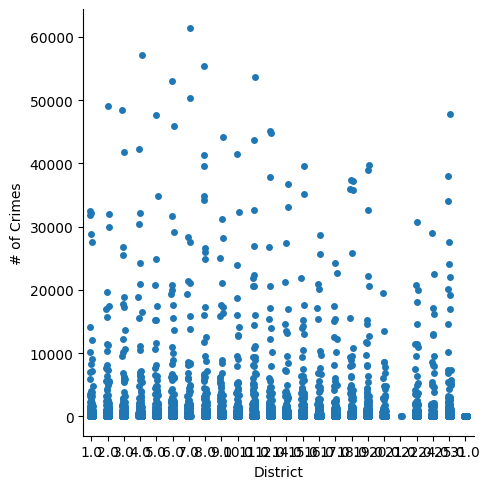

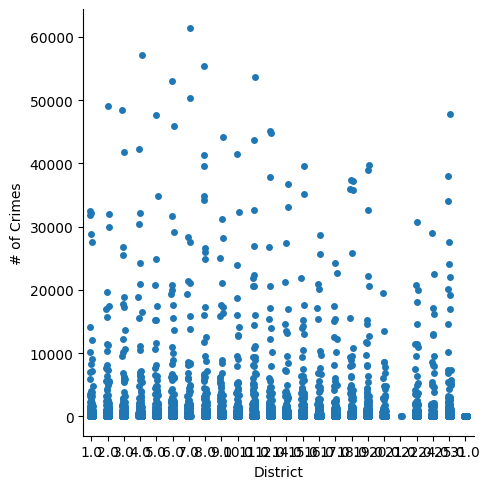

In [34]:
g = sns.catplot(data=plot_df_perc, x='District', y='# of Crimes');

for col, ax in g.axes_dict.items():
    
    min_, max_ = val_counts_by_hour.loc[col].agg(['idxmin','idxmax'])
    
    ax.legend()
    
    ax.grid(axis='x')
    
g.fig

Looking at the data we can see that the district with the least crime is 1 and the highest is 61334.

### Is the total number of crimes increasing or decreasing across the years?

In [35]:
df_year = df.groupby('Description').resample('A').sum().reset_index()
df_year

C:\Users\aliss\AppData\Local\Temp\ipykernel_25748\1731138656.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_year = df.groupby('Description').resample('A').sum().reset_index()
C:\Users\aliss\AppData\Local\Temp\ipykernel_25748\1731138656.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_year = df.groupby('Description').resample('A').sum().reset_index()
C:\Users\aliss\AppData\Local\Temp\ipykernel_25748\1731138656.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select 

Description       Date        ID  Arrest  Domestic  Beat  District  \
0      $300 AND UNDER 2001-12-31   8712213       0         0  6034     59.00   
1      $300 AND UNDER 2002-12-31   4487399       0         0  2544     25.00   
2      $300 AND UNDER 2003-12-31         0       0         0     0      0.00   
3      $300 AND UNDER 2004-12-31         0       0         0     0      0.00   
4      $300 AND UNDER 2005-12-31   3821599       0         0   812      8.00   
...               ...        ...       ...     ...       ...   ...       ...   
8368  WIREROOM/SPORTS 2007-12-31  27450332       5         0  6704     66.00   
8369  WIREROOM/SPORTS 2008-12-31         0       0         0     0      0.00   
8370  WIREROOM/SPORTS 2009-12-31         0       0         0     0      0.00   
8371  WIREROOM/SPORTS 2010-12-31   7355872       1         0  1733     17.00   
8372  WIREROOM/SPORTS 2011-12-31   8392357       1         0   815      8.00   

       Ward  Latitude  Longitude   Year  Month  DayNum  HourOfDay  
0      0.00    209.28    -438.25  10005     44      13         71  
1     48.00     83.77    -175.53   4004     15       3         41  
2      0.00      0.00       0.00      0      0       0          0  
3      0.00      0.00       0.00      0      0       0          0  
4     13.00     41.78     -87.76   2005      2       6          2  
...     ...       ...        ...    ...    ...     ...        ...  
8368 135.00    209.46    -438.38  10035     20      17         61  
8369   0.00      0.00       0.00      0      0       0          0  
8370   0.00      0.00       0.00      0      0       0          0  
8371  35.00     41.95     -87.71   2010      2       3         13  
8372  23.00     41.81     -87.73   2011     11       1         22  

[8373 rows x 14 columns]

In [36]:
years_ts = df_year.pivot(index='Date',columns='Description')
years_ts.head()

ID                                                     \
Description $300 AND UNDER     $500 AND UNDER ABUSE / NEGLECT - CARE FACILITY   
Date                                                                            
2001-12-31    8,712,213.00 100,285,107,353.00                             NaN   
2002-12-31    4,487,399.00 104,682,531,258.00                             NaN   
2003-12-31            0.00 105,208,855,759.00                             NaN   
2004-12-31            0.00 123,389,797,648.00                             NaN   
2005-12-31    3,821,599.00 115,944,002,871.00                             NaN   

                                                       \
Description ABUSE/NEGLECT: CARE FACILITY      ADULTRY   
Date                                                    
2001-12-31                           NaN          NaN   
2002-12-31                  4,834,294.00 4,548,756.00   
2003-12-31                 31,977,943.00 2,676,110.00   
2004-12-31                 42,343,237.00 3,591,692.00   
2005-12-31                 12,091,339.00         0.00   

                                                                     \
Description AGG CRIM SEX ABUSE FAM MEMBER AGG CRIMINAL SEXUAL ABUSE   
Date                                                                  
2001-12-31                 426,074,071.00          1,276,470,003.00   
2002-12-31                 591,316,883.00          1,201,586,931.00   
2003-12-31                 842,027,789.00          1,624,035,305.00   
2004-12-31                 933,563,754.00          1,614,577,479.00   
2005-12-31               1,044,239,973.00          1,961,168,928.00   

                                                                     \
Description AGG PO HANDS ETC SERIOUS INJ AGG PO HANDS NO/MIN INJURY   
Date                                                                  
2001-12-31                           NaN             629,961,584.00   
2002-12-31                           NaN           1,333,865,644.00   
2003-12-31                 59,642,932.00           2,723,536,509.00   
2004-12-31                147,854,102.00           3,575,567,941.00   
2005-12-31                135,907,853.00           4,966,833,973.00   

                                                                \
Description AGG PRO EMP HANDS SERIOUS INJ AGG PRO.EMP: HANDGUN   
Date                                                             
2001-12-31                            NaN        18,714,187.00   
2002-12-31                            NaN        51,823,908.00   
2003-12-31                  54,246,399.00       120,350,590.00   
2004-12-31                  69,463,873.00        89,119,269.00   
2005-12-31                  72,751,994.00       122,317,192.00   

                                                                       \
Description AGG PRO.EMP: OTHER DANG WEAPON AGG PRO.EMP: OTHER FIREARM   
Date                                                                    
2001-12-31                   58,761,616.00               1,823,492.00   
2002-12-31                  275,052,910.00              19,224,253.00   
2003-12-31                  532,379,151.00              47,543,531.00   
2004-12-31                  658,198,152.00              34,480,400.00   
2005-12-31                  845,310,955.00              16,859,976.00   

                                            \
Description AGG PRO.EMP:KNIFE/CUTTING INST   
Date                                         
2001-12-31                   22,547,466.00   
2002-12-31                   39,119,596.00   
2003-12-31                  117,355,436.00   
2004-12-31                  136,581,657.00   
2005-12-31                  105,441,626.00   

                                                          \
Description AGG RIT MUT: HANDS/FIST/FEET NO/MINOR INJURY   
Date                                                       
2001-12-31                                           NaN   
2002-12-31                                  2,329,187.00 

In [37]:
years_ts.columns

MultiIndex([(       'ID',                                  '$300 AND UNDER'),
            (       'ID',                                  '$500 AND UNDER'),
            (       'ID',                 'ABUSE / NEGLECT - CARE FACILITY'),
            (       'ID',                    'ABUSE/NEGLECT: CARE FACILITY'),
            (       'ID',                                         'ADULTRY'),
            (       'ID',                   'AGG CRIM SEX ABUSE FAM MEMBER'),
            (       'ID',                       'AGG CRIMINAL SEXUAL ABUSE'),
            (       'ID',                    'AGG PO HANDS ETC SERIOUS INJ'),
            (       'ID',                      'AGG PO HANDS NO/MIN INJURY'),
            (       'ID',                   'AGG PRO EMP HANDS SERIOUS INJ'),
            ...
            ('HourOfDay',          'VIOLATION OF STALKING NO CONTACT ORDER'),
            ('HourOfDay',                    'VIOLATION OF SUMMARY CLOSURE'),
            ('HourOfDay',          'VIOLENT OFFE

In [38]:
years_ts.columns = years_ts.columns.droplevel(0)
years_ts.columns

Index(['$300 AND UNDER', '$500 AND UNDER', 'ABUSE / NEGLECT - CARE FACILITY',
       'ABUSE/NEGLECT: CARE FACILITY', 'ADULTRY',
       'AGG CRIM SEX ABUSE FAM MEMBER', 'AGG CRIMINAL SEXUAL ABUSE',
       'AGG PO HANDS ETC SERIOUS INJ', 'AGG PO HANDS NO/MIN INJURY',
       'AGG PRO EMP HANDS SERIOUS INJ',
       ...
       'VIOLATION OF STALKING NO CONTACT ORDER',
       'VIOLATION OF SUMMARY CLOSURE',
       'VIOLENT OFFENDER - ANNUAL REGISTRATION',
       'VIOLENT OFFENDER - DUTY TO REGISTER',
       'VIOLENT OFFENDER - FAIL TO REGISTER NEW ADDRESS',
       'VIOLENT OFFENDER: ANNUAL REGISTRATION',
       'VIOLENT OFFENDER: DUTY TO REGISTER',
       'VIOLENT OFFENDER: FAIL TO REGISTER NEW ADDRESS', 'WIREROOM/HORSES',
       'WIREROOM/SPORTS'],
      dtype='object', name='Description', length=6552)

In [39]:
delta_crime_yrs = years_ts.loc['2001'] - years_ts.loc['2023']
delta_crime_yrs

Description  $300 AND UNDER  $500 AND UNDER  ABUSE / NEGLECT - CARE FACILITY  \
Date                                                                           
2001-12-31              NaN             NaN                              NaN   
2023-12-31              NaN             NaN                              NaN   

Description  ABUSE/NEGLECT: CARE FACILITY  ADULTRY  \
Date                                                 
2001-12-31                            NaN      NaN   
2023-12-31                            NaN      NaN   

Description  AGG CRIM SEX ABUSE FAM MEMBER  AGG CRIMINAL SEXUAL ABUSE  \
Date                                                                    
2001-12-31                             NaN                        NaN   
2023-12-31                             NaN                        NaN   

Description  AGG PO HANDS ETC SERIOUS INJ  AGG PO HANDS NO/MIN INJURY  \
Date                                                                    
2001-12-31                            NaN                         NaN   
2023-12-31                            NaN                         NaN   

Description  AGG PRO EMP HANDS SERIOUS INJ  AGG PRO.EMP: HANDGUN  \
Date                                                               
2001-12-31                             NaN                   NaN   
2023-12-31                             NaN                   NaN   

Description  AGG PRO.EMP: OTHER DANG WEAPON  AGG PRO.EMP: OTHER FIREARM  \
Date                                                                      
2001-12-31                              NaN                         NaN   
2023-12-31                              NaN                         NaN   

Description  AGG PRO.EMP:KNIFE/CUTTING INST  \
Date                                          
2001-12-31                              NaN   
2023-12-31                              NaN   

Description  AGG RIT MUT: HANDS/FIST/FEET NO/MINOR INJURY  \
Date                                                        
2001-12-31                                            NaN   
2023-12-31                                            NaN   

Description  AGG RIT MUT: HANDS/FIST/FEET SERIOUS INJURY  \
Date                                                       
2001-12-31                                           NaN   
2023-12-31                                           NaN   

Description  AGG RITUAL MUT:HANDGUN  AGG RITUAL MUT:KNIFE/CUTTING I  \
Date                                                                  
2001-12-31                      NaN                             NaN   
2023-12-31                      NaN                             NaN   

Description  AGG RITUAL MUT:OTH DANG WEAPON  AGG SEX ASSLT OF CHILD FAM MBR  \
Date                                                                          
2001-12-31                              NaN                             NaN   
2023-12-31                              NaN                             NaN   

Description  AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SERIOUS INJURY  \
Date                                                                      
2001-12-31                                                 NaN            
2023-12-31                                                 NaN            

Description  AGG. PROTECTED EMPLOYEE - HANDS, FISTS, FEET, SERIOUS INJURY  \
Date                                                                        
2001-12-31                                                 NaN              
2023-12-31                                                 NaN              

Description  AGG. RITUAL MUTILATION - HANDS, FISTS, FEET, SERIOUS INJURY  \
Date                                                                       
2001-12-31                                                 NaN             
2023-12-31                                                 NaN             

Description  AGG: FINANCIAL ID THEFT  AGG: HANDS/FIST/FEET NO/MINOR INJURY  \
Date                            

In [40]:
delta_crime_yrs = years_ts.loc['2023-12-31'] - years_ts.loc['2001-12-31']
delta_crime_yrs

Description
$300 AND UNDER                                                  NaN
$500 AND UNDER                                   -11,647,622,288.00
ABUSE / NEGLECT - CARE FACILITY                                 NaN
ABUSE/NEGLECT: CARE FACILITY                                    NaN
ADULTRY                                                         NaN
                                                        ...        
VIOLENT OFFENDER: ANNUAL REGISTRATION                           NaN
VIOLENT OFFENDER: DUTY TO REGISTER                              NaN
VIOLENT OFFENDER: FAIL TO REGISTER NEW ADDRESS                  NaN
WIREROOM/HORSES                                                 NaN
WIREROOM/SPORTS                                                 NaN
Length: 6552, dtype: float64

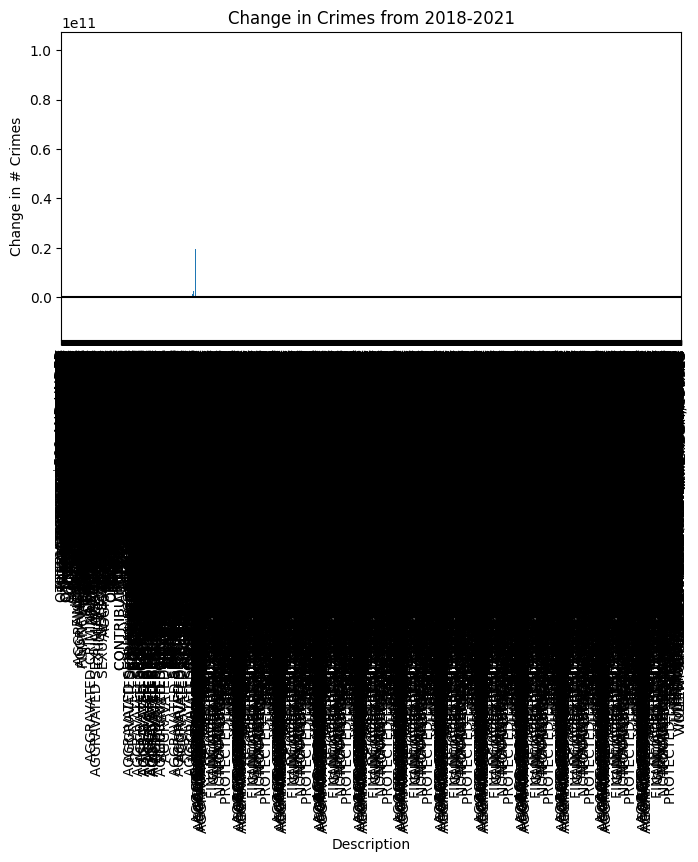

In [41]:
ax = delta_crime_yrs.sort_values().plot(kind='bar',figsize=(8,4),
                                       ylabel='Change in # Crimes',
                                       title='Change in Crimes from 2018-2021')
ax.axhline(0,color='k');

In [42]:
delta_crime_perc = (delta_crime_yrs/ years_ts.loc['2001-12-31'])*100
delta_crime_perc.sort_values()

Description
FINANCIAL IDENTITY THEFT OVER $ 300              -inf
SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER         -inf
THEFT BY LESSEE, MOTOR VEHICLE                   -inf
ATTEMPT - FINANCIAL IDENTITY THEFT               -inf
THEFT OF LOST / MISLAID PROPERTY                 -inf
                                                 ... 
VIOLENT OFFENDER: ANNUAL REGISTRATION             NaN
VIOLENT OFFENDER: DUTY TO REGISTER                NaN
VIOLENT OFFENDER: FAIL TO REGISTER NEW ADDRESS    NaN
WIREROOM/HORSES                                   NaN
WIREROOM/SPORTS                                   NaN
Length: 6552, dtype: float64

Looking at the data and the visual, there does appear to have been an increase for some crimes, but not all of them

### Are crimes more common during AM rush hour or PM rush hour?

In [43]:
crimes_by_hour = df.groupby('Description')['HourOfDay'].value_counts().sort_index()
crimes_by_hour

Description      HourOfDay
$300 AND UNDER   0            5
                 2            1
                 8            3
                 13           1
                 14           1
                             ..
WIREROOM/SPORTS  17           4
                 18           9
                 19           3
                 21           1
                 22           1
Name: HourOfDay, Length: 10343, dtype: int64

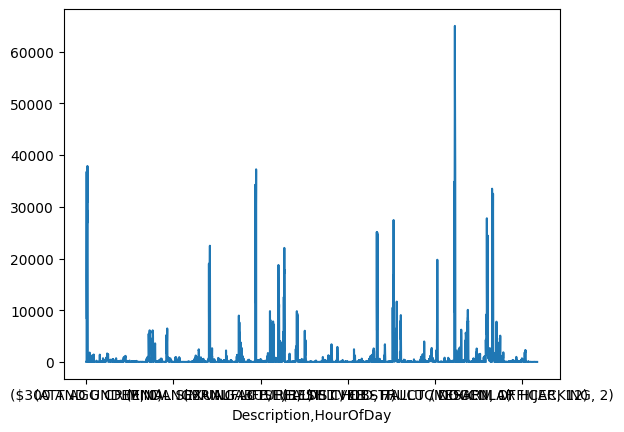

In [44]:
crimes_by_hour.plot();

In [45]:
plot_df = crimes_by_hour.to_frame('# of Crimes').reset_index()
plot_df

Description  HourOfDay  # of Crimes
0       $300 AND UNDER          0            5
1       $300 AND UNDER          2            1
2       $300 AND UNDER          8            3
3       $300 AND UNDER         13            1
4       $300 AND UNDER         14            1
...                ...        ...          ...
10338  WIREROOM/SPORTS         17            4
10339  WIREROOM/SPORTS         18            9
10340  WIREROOM/SPORTS         19            3
10341  WIREROOM/SPORTS         21            1
10342  WIREROOM/SPORTS         22            1

[10343 rows x 3 columns]

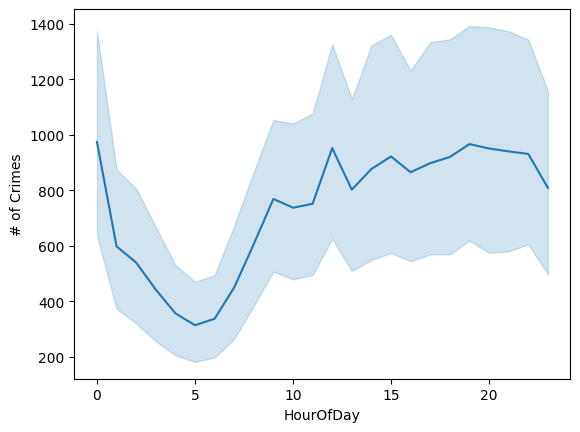

In [46]:
ax = sns.lineplot(data=plot_df, x='HourOfDay',y='# of Crimes')

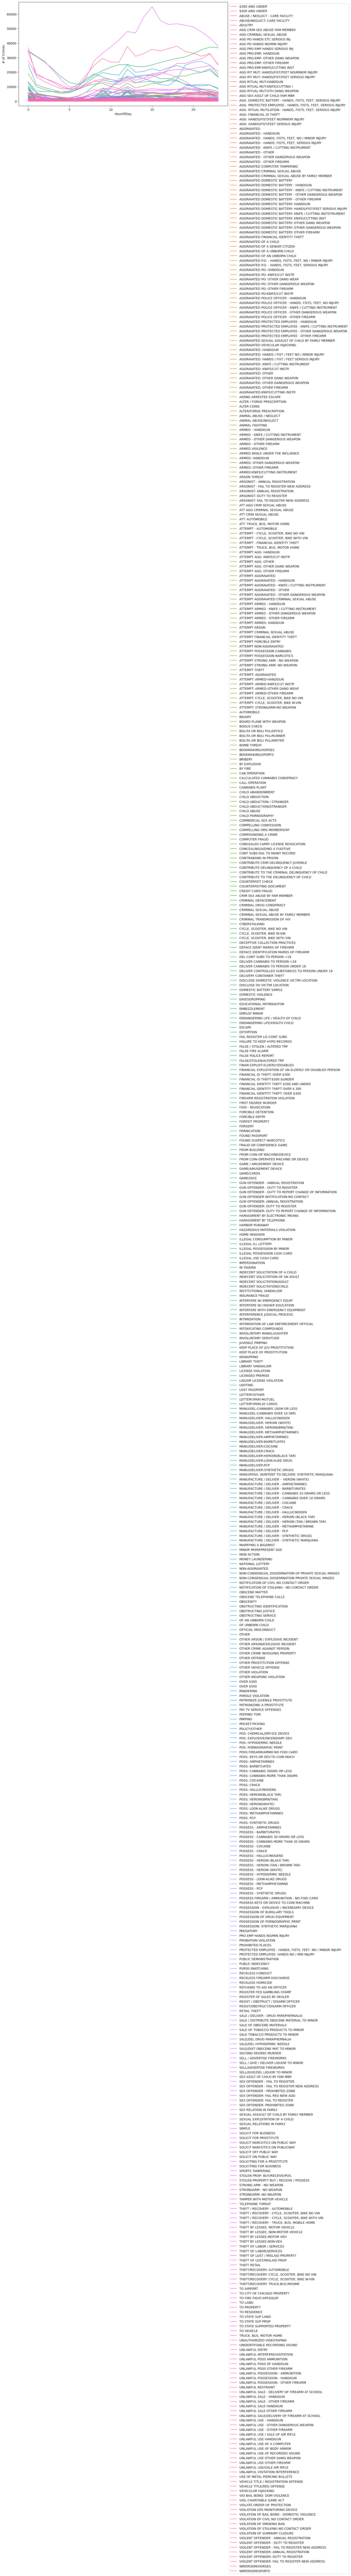

In [47]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=plot_df, x='HourOfDay',y='# of Crimes',markers=True,
                  hue='Description',ax=ax,)
ax.legend(bbox_to_anchor=[1,1]);

Looking at the above visual we can see that [blank] rush hour on average has the most crime

### What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?

In [48]:
crimes_by_hour = df.groupby('HourOfDay')['Description'].value_counts().sort_index()
crimes_by_hour

HourOfDay  Description                                    
0          $300 AND UNDER                                         5
           $500 AND UNDER                                     36784
           ABUSE / NEGLECT - CARE FACILITY                        4
           ABUSE/NEGLECT: CARE FACILITY                          15
           ADULTRY                                                1
                                                              ...  
23         VIOLENT OFFENDER - DUTY TO REGISTER                    2
           VIOLENT OFFENDER - FAIL TO REGISTER NEW ADDRESS        1
           VIOLENT OFFENDER: ANNUAL REGISTRATION                 14
           VIOLENT OFFENDER: DUTY TO REGISTER                     5
           VIOLENT OFFENDER: FAIL TO REGISTER NEW ADDRESS         4
Name: Description, Length: 10343, dtype: int64

####  7 AM - 10 AM

In [49]:
am_crimes = crimes_by_hour.loc[7] + crimes_by_hour.loc[19]
am_crimes

Description
$300 AND UNDER                                         NaN
$500 AND UNDER                                   52,150.00
ABUSE / NEGLECT - CARE FACILITY                        NaN
ABUSE/NEGLECT: CARE FACILITY                         14.00
AGG CRIM SEX ABUSE FAM MEMBER                        96.00
                                                    ...   
VIOLENT OFFENDER: ANNUAL REGISTRATION                20.00
VIOLENT OFFENDER: DUTY TO REGISTER                    9.00
VIOLENT OFFENDER: FAIL TO REGISTER NEW ADDRESS         NaN
WIREROOM/HORSES                                        NaN
WIREROOM/SPORTS                                        NaN
Name: Description, Length: 473, dtype: float64

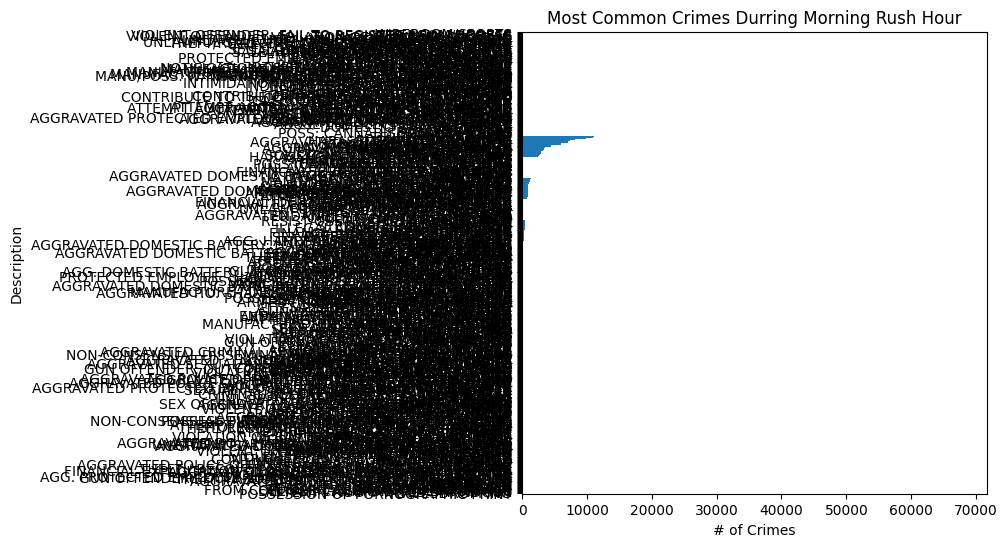

In [50]:
ax = am_crimes.sort_values().plot(kind='barh',figsize=(6,6))
ax.set(title='Most Common Crimes Durring Morning Rush Hour',xlabel='# of Crimes');

#### 4 PM - 7 PM

In [51]:
pm_crimes = crimes_by_hour.loc[16] + crimes_by_hour.loc[10]
pm_crimes

Description
$500 AND UNDER                                   61,520.00
ABUSE / NEGLECT - CARE FACILITY                       9.00
ABUSE/NEGLECT: CARE FACILITY                          9.00
ADULTRY                                                NaN
AGG CRIM SEX ABUSE FAM MEMBER                       148.00
                                                    ...   
VIOLENT OFFENDER: ANNUAL REGISTRATION                19.00
VIOLENT OFFENDER: DUTY TO REGISTER                   11.00
VIOLENT OFFENDER: FAIL TO REGISTER NEW ADDRESS       10.00
WIREROOM/HORSES                                        NaN
WIREROOM/SPORTS                                        NaN
Name: Description, Length: 478, dtype: float64

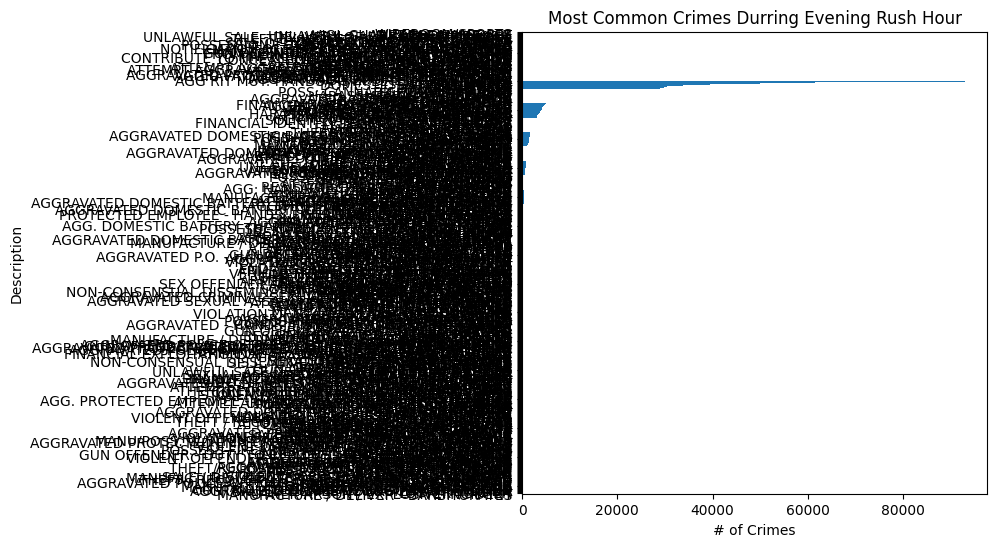

In [52]:
ax = pm_crimes.sort_values().plot(kind='barh',figsize=(6,6))
ax.set(title='Most Common Crimes Durring Evening Rush Hour',xlabel='# of Crimes');

### Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

In [53]:
CRIMES = {}

In [54]:
crime ='AUTOMOBILE','ATTEMPT - AUTOMOBILE', 'THEFT / RECOVERY - AUTOMOBILE', 'ATT: AUTOMOBILE', 'THEFT/RECOVERY: AUTOMOBILE'
crime

('AUTOMOBILE',
 'ATTEMPT - AUTOMOBILE',
 'THEFT / RECOVERY - AUTOMOBILE',
 'ATT: AUTOMOBILE',
 'THEFT/RECOVERY: AUTOMOBILE')

In [55]:
temp = df.loc[ df['Description']==crime]
temp.head(3)

Empty DataFrame
Columns: [ID, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Latitude, Longitude, Date, Year, Month, MonthName, DayOfWeek, DayNum, HourOfDay]
Index: []

In [56]:
temp_res = temp.resample("D").size()
temp_res

Series([], Freq: D, dtype: int64)

In [57]:
CRIMES[crime] = temp_res.copy()
CRIMES.keys()

dict_keys([('AUTOMOBILE', 'ATTEMPT - AUTOMOBILE', 'THEFT / RECOVERY - AUTOMOBILE', 'ATT: AUTOMOBILE', 'THEFT/RECOVERY: AUTOMOBILE')])

In [58]:
CRIMES

{('AUTOMOBILE',
  'ATTEMPT - AUTOMOBILE',
  'THEFT / RECOVERY - AUTOMOBILE',
  'ATT: AUTOMOBILE',
  'THEFT/RECOVERY: AUTOMOBILE'): Series([], Freq: D, dtype: int64)}

In [59]:
crime_list = df['Description'].unique()
crime_list

array(['AGG CRIMINAL SEXUAL ABUSE', 'AGG: FINANCIAL ID THEFT',
       'FINANCIAL ID THEFT: OVER $300', 'CREDIT CARD FRAUD', 'PREDATORY',
       'UNLAWFUL ENTRY', 'OVER $500', 'FINANCIAL ID THEFT:$300 &UNDER',
       'EMBEZZLEMENT', '$500 AND UNDER', 'TO VEHICLE',
       'CRIM SEX ABUSE BY FAM MEMBER', 'AGG CRIM SEX ABUSE FAM MEMBER',
       'CONTRIBUTE DELINQUENCY OF A CHILD',
       'AGG SEX ASSLT OF CHILD FAM MBR', 'FORGERY', 'CHILD PORNOGRAPHY',
       'TO PROPERTY', 'TELEPHONE THREAT', 'AGGRAVATED: OTHER',
       'CHILD ABUSE', 'NON-AGGRAVATED', 'HARASSMENT BY TELEPHONE',
       'FINANCIAL IDENTITY THEFT OVER $ 300',
       'SEX ASSLT OF CHILD BY FAM MBR',
       'AGGRAVATED FINANCIAL IDENTITY THEFT', 'CRIMINAL SEXUAL ABUSE',
       'FRAUD OR CONFIDENCE GAME',
       'SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER',
       'THEFT OF LABOR/SERVICES', 'SIMPLE',
       'FINAN EXPLOIT-ELDERLY/DISABLED', 'ENDANGERING LIFE/HEALTH CHILD',
       'OTHER CRIME INVOLVING PROPERTY', 'AUTOMOBILE',
 

In [60]:
CRIMES = {}

for crime in crime_list:
    
   temp = df.loc[ df['Description']==crime].copy()

   temp_res = temp.resample("D").size() 

   CRIMES[crime] = temp_res.copy() 
CRIMES.keys()

dict_keys(['AGG CRIMINAL SEXUAL ABUSE', 'AGG: FINANCIAL ID THEFT', 'FINANCIAL ID THEFT: OVER $300', 'CREDIT CARD FRAUD', 'PREDATORY', 'UNLAWFUL ENTRY', 'OVER $500', 'FINANCIAL ID THEFT:$300 &UNDER', 'EMBEZZLEMENT', '$500 AND UNDER', 'TO VEHICLE', 'CRIM SEX ABUSE BY FAM MEMBER', 'AGG CRIM SEX ABUSE FAM MEMBER', 'CONTRIBUTE DELINQUENCY OF A CHILD', 'AGG SEX ASSLT OF CHILD FAM MBR', 'FORGERY', 'CHILD PORNOGRAPHY', 'TO PROPERTY', 'TELEPHONE THREAT', 'AGGRAVATED: OTHER', 'CHILD ABUSE', 'NON-AGGRAVATED', 'HARASSMENT BY TELEPHONE', 'FINANCIAL IDENTITY THEFT OVER $ 300', 'SEX ASSLT OF CHILD BY FAM MBR', 'AGGRAVATED FINANCIAL IDENTITY THEFT', 'CRIMINAL SEXUAL ABUSE', 'FRAUD OR CONFIDENCE GAME', 'SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER', 'THEFT OF LABOR/SERVICES', 'SIMPLE', 'FINAN EXPLOIT-ELDERLY/DISABLED', 'ENDANGERING LIFE/HEALTH CHILD', 'OTHER CRIME INVOLVING PROPERTY', 'AUTOMOBILE', 'FINANCIAL IDENTITY THEFT $300 AND UNDER', 'AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER', 'SEXUAL EXP

### Are there any holidays that show an increase in the # of crimes? What about a decrease?

In [61]:
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [62]:
all_days = pd.date_range(df["Date"].min(), df["Date"].max())
all_days

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
               '2001-01-09', '2001-01-10',
               ...
               '2023-05-23', '2023-05-24', '2023-05-25', '2023-05-26',
               '2023-05-27', '2023-05-28', '2023-05-29', '2023-05-30',
               '2023-05-31', '2023-06-01'],
              dtype='datetime64[ns]', length=8187, freq='D')

In [63]:
## Testing first date
print(all_days[0])
us_holidays.get(all_days[0])

2001-01-01 00:00:00


"New Year's Day"

In [64]:
holiday_list = [us_holidays.get(day) for day in all_days]
holiday_list[:5]

["New Year's Day", None, None, None, None]

In [65]:
md_holidays = country_holidays('US', subdiv='MD')
md_holidays

holidays.country_holidays('US', subdiv='MD')

In [66]:
df["US Holiday"] = [us_holidays.get(day) for day in df['Date']]
df['MD Holiday'] = [md_holidays.get(day) for day in df['Date']]
df.head()

ID Primary Type                    Description  \
Date                                                              
2001-01-01  9755169  SEX OFFENSE      AGG CRIMINAL SEXUAL ABUSE   
2001-01-01  3272413        THEFT        AGG: FINANCIAL ID THEFT   
2001-01-01  9754963  SEX OFFENSE      AGG CRIMINAL SEXUAL ABUSE   
2001-01-01  9754968  SEX OFFENSE      AGG CRIMINAL SEXUAL ABUSE   
2001-01-01  2980108        THEFT  FINANCIAL ID THEFT: OVER $300   

                         Location Description  Arrest  Domestic  Beat  \
Date                                                                    
2001-01-01  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   False     False  1022   
2001-01-01                          RESIDENCE   False     False   621   
2001-01-01  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   False     False  1022   
2001-01-01  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   False     False  1022   
2001-01-01                          RESIDENCE   False     False  1622   

            District  Ward  Latitude  Longitude       Date  Year  Month  \
Date                                                                      
2001-01-01     10.00 24.00       NaN        NaN 2001-01-01  2001      1   
2001-01-01      6.00 17.00     41.76     -87.64 2001-01-01  2001      1   
2001-01-01     10.00 24.00       NaN        NaN 2001-01-01  2001      1   
2001-01-01     10.00 24.00       NaN        NaN 2001-01-01  2001      1   
2001-01-01     16.00 38.00     41.96     -87.78 2001-01-01  2001      1   

           MonthName DayOfWeek  DayNum  HourOfDay      US Holiday  \
Date                                                                
2001-01-01   January    Monday       0          0  New Year's Day   
2001-01-01   January    Monday       0          0  New Year's Day   
2001-01-01   January    Monday       0          0  New Year's Day   
2001-01-01   January    Monday       0          0  New Year's Day   
2001-01-01   January    Monday       0          0  New Year's Day   

                MD Holiday  
Date                        
2001-01-01  New Year's Day  
2001-01-01  New Year's Day  
2001-01-01  New Year's Day  
2001-01-01  New Year's Day  
2001-01-01  New Year's Day

In [67]:
df['US Holiday'].value_counts()

New Year's Day                                     33580
Independence Day                                   22669
Labor Day                                          22162
Memorial Day                                       21824
Columbus Day                                       20918
Veterans Day                                       20416
Martin Luther King Jr. Day                         18590
Washington's Birthday                              18224
Thanksgiving                                       14794
Christmas Day                                      12415
Independence Day (Observed)                         5884
Veterans Day (Observed)                             5842
New Year's Day (Observed)                           5524
Christmas Day (Observed)                            4927
Juneteenth National Independence Day                1450
Juneteenth National Independence Day (Observed)     1402
Name: US Holiday, dtype: int64

In [68]:
df['MD Holiday'].value_counts()

New Year's Day                                             33580
Independence Day                                           22669
Labor Day                                                  22162
Memorial Day                                               21824
Columbus Day                                               20918
Veterans Day                                               20416
Washington's Birthday                                      18224
Martin Luther King Jr. Day                                 17925
Thanksgiving                                               14794
Christmas Day                                              12415
American Indian Heritage Day                               11217
Independence Day (Observed)                                 5884
Veterans Day (Observed)                                     5842
New Year's Day (Observed)                                   5524
Inauguration Day                                            5348
Christmas Day (Observed) 

Observing the data we can see that New Year's Day has the most crime of the various holidays, where as Inauguration Day (Observed) and Martin Luther King Jr. Day are tied for the lowest amount of crime in Chicago.